In [2]:
## Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("train.csv")

In [5]:
# Simulated dataset for demonstration
np.random.seed(42)
df = pd.DataFrame({
    'GrLivArea': np.random.randint(500, 4000, 100),
    'BedroomAbvGr': np.random.randint(1, 6, 100),
    'FullBath': np.random.randint(1, 4, 100),
    'SalePrice': np.random.randint(50000, 500000, 100)
})

In [6]:
## Feature Selection
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

In [7]:
## Handle Missing Values
df = df.dropna()

In [8]:
## Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(df[features])
y = df[target]

In [9]:
## Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
## Train Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
## Predictions
y_pred = model.predict(X_test)

In [12]:
## Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [13]:
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

MAE: 121531.43, RMSE: 144295.57, R²: -0.1278


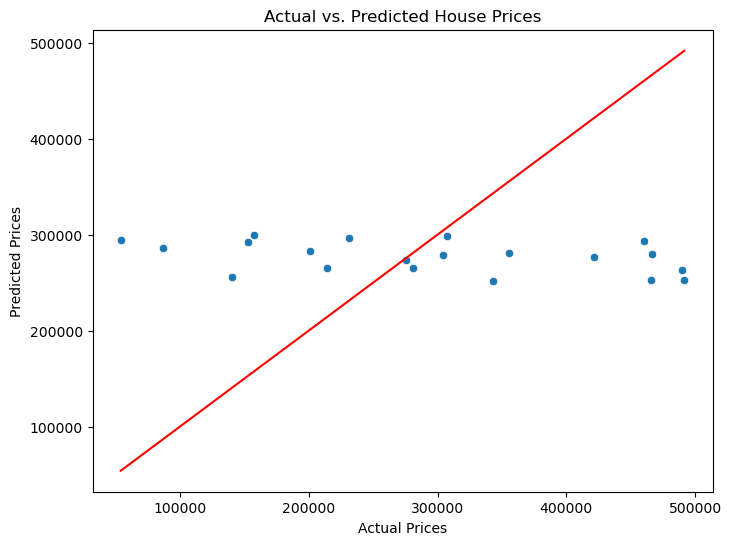

In [14]:
## Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()